In [3]:
import main
import matplotlib.pyplot as plt
from main import Item
from decimal import Decimal
from response_phase2 import Steps
from typing_extensions import List

In [4]:
import numpy as np
def plotter_Function(X_Array_1,Y_Array_1,X_Array_2,Y_Array_2):
    
    Fig, ax = plt.subplots(figsize=(12,10))
    plt.plot(X_Array_1, Y_Array_1, 'o-', markersize=12, linewidth=3, label='Data')
    plt.plot(X_Array_2, Y_Array_2, 'o-', markersize=12, linewidth=3, label='False Position')
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Error (%)")
    ax.set_title(f"Comparison between Bisection and false Position\n Function = {function}")
    ax.plot(X_Array_1,Y_Array_1)
    ax.plot(X_Array_2,Y_Array_2)
    ax.axhline(y=0,color="black",linestyle="solid")
    ax.axvline(x=0,color="black",linestyle="solid")
    plt.xlim(0,max(np.max(X_Array_1),np.max(X_Array_2)))
    plt.ylim(-.05,101)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    ax.grid(True)
    Fig.show()

In [5]:
function = "x^3 - 3*x + 1"

In [6]:
Input = Item.construct(Function= function
             ,MethodId="Newton"
             ,X_Lower= Decimal("0")
             ,X_Upper=Decimal("1")
             ,Xo_Initial=Decimal("0")
             ,X1_Initial=Decimal("1")
             ,maxIteration=30
             ,precision=20
             ,Tolerance=1e-9
             )

C:\Users\User\AppData\Local\Temp\ipykernel_24836\211713944.py:1: PydanticDeprecatedSince20: The `construct` method is deprecated; use `model_construct` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  Input = Item.construct(Function= function


In [7]:
Steps_Bi = main.Bisection(item = Input,all_steps=[]).steps
Steps_FP = main.False_Position(item = Input,all_steps=[]).steps

0


In [8]:
Errors_Bi = [float(Steps_Bi[i].Error*100) for i in range(len(Steps_Bi))]
Iterations_Bi = [i for i in range(len(Steps_Bi))]
Errors_FP = [float(Steps_FP[i].Error*100) for i in range(len(Steps_FP))]
Iterations_FP = [i for i in range(len(Steps_FP))]

C:\Users\User\AppData\Local\Temp\ipykernel_24836\2859079363.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  Fig.show()


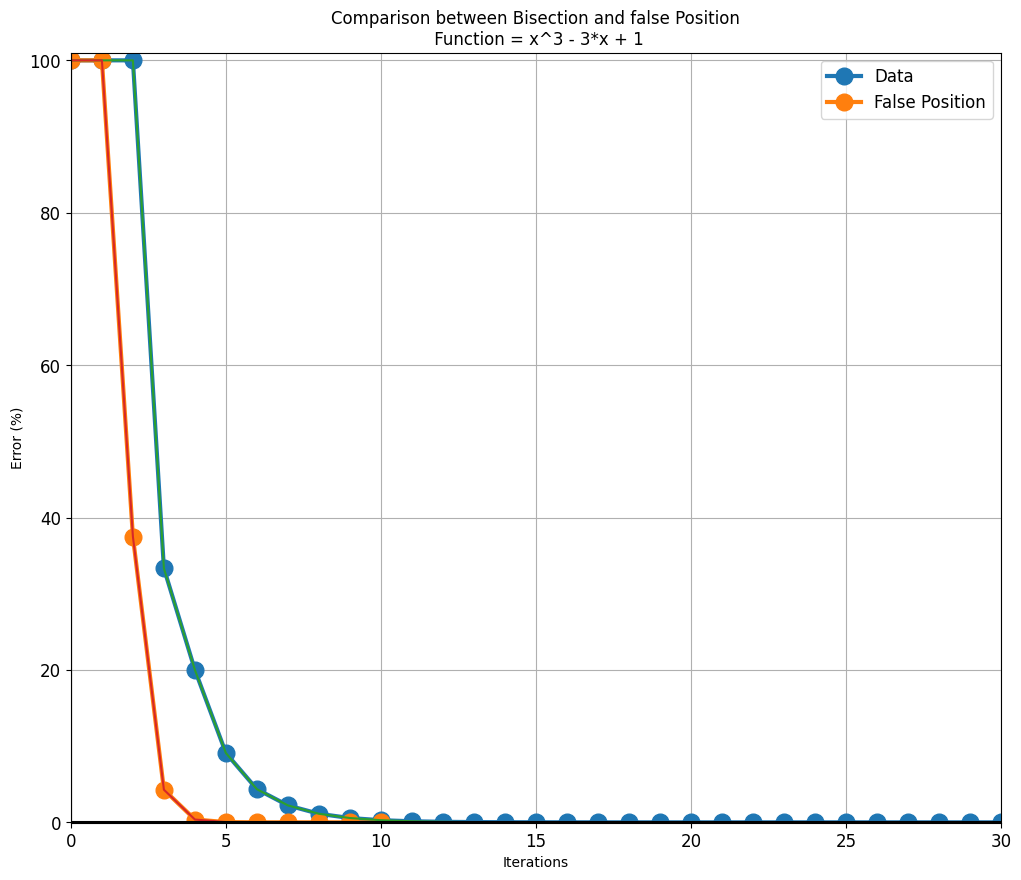

In [9]:
plotter_Function(Iterations_Bi,Errors_Bi,Iterations_FP,Errors_FP)

In [10]:
Steps_Newton = main.Newton_Normal(item = Input,all_steps=[]).steps
Steps_Secant = main.secant_method(item = Input,all_steps=[]).steps

epsilon reached in 5 iterations


In [11]:
Errors_Newton = [float(Steps_Newton[i].Error) for i in range(len(Steps_Newton))]
Iterations_Newton = [i for i in range(len(Steps_Newton))]
Errors_Secant = [float(Steps_Secant[i].Error) for i in range(len(Steps_Secant))]
Iterations_Secant = [i for i in range(len(Steps_Secant))]

C:\Users\User\AppData\Local\Temp\ipykernel_24836\2859079363.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  Fig.show()


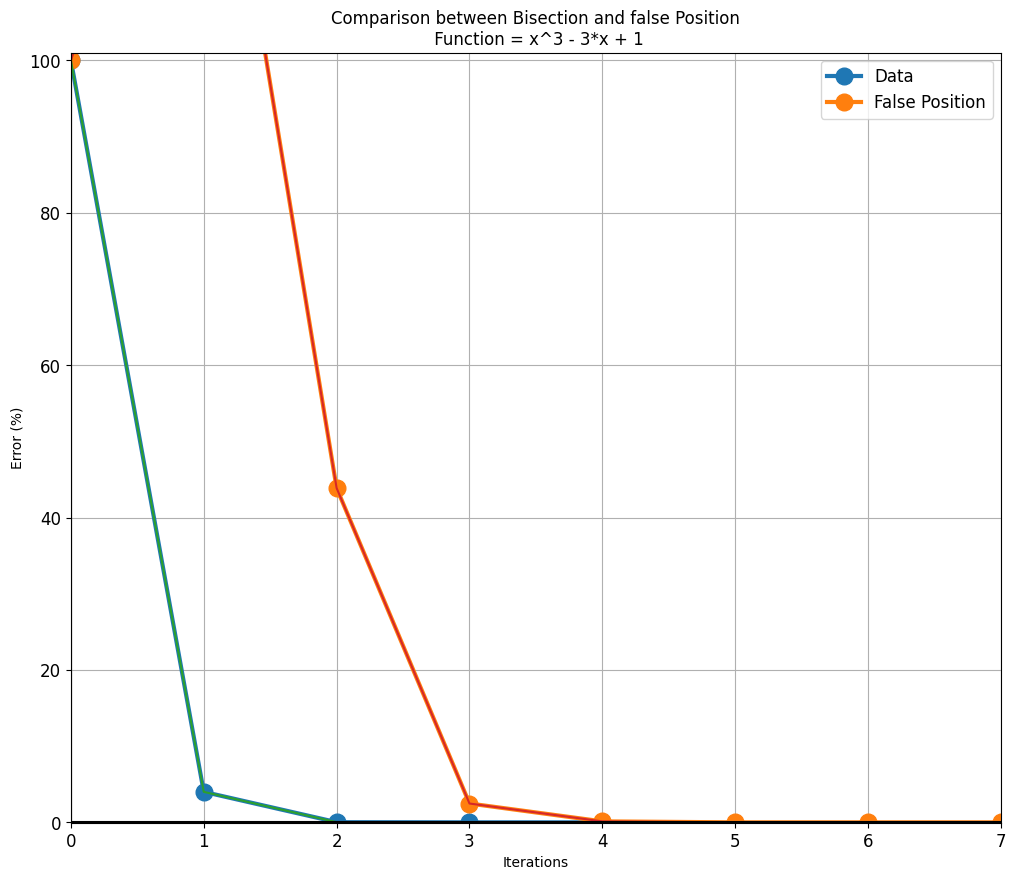

In [12]:
plotter_Function(Iterations_Newton,Errors_Newton,Iterations_Secant,Errors_Secant)

In [106]:
Iteration_Collection = {1:Iterations_Bi,
                        2:Iterations_FP,
                        3:Iterations_Newton,
                        4:Iterations_Secant}
Errors_Collection = {1:Errors_Bi,
                        2:Errors_FP,
                        3:Errors_Newton,
                        4:Errors_Secant}
Name_Collection = {1:"BiSection",
                        2:"FalsePosition",
                        3:"Newton",
                        4:"Secant"}
def plotter_Function_Package(X_Array,Y_Array,Name_Collection,Function):
    Fig, ax = plt.subplots(figsize=(12,10))
    max_error = -1
    max_Iterations = -1
    for i in range(1,len(X_Array)+1):
        if(len(X_Array[i])==0):
            X_Array[i] = [i for i in range(max_Iterations)]
            Y_Array[i] = [-2 for i in range(max_Iterations)]
        plt.plot(X_Array[i], Y_Array[i], 'o-', markersize=5, linewidth=3, label=Name_Collection[i])
        ax.set_xlabel("Iterations")
        ax.set_ylabel("Error (%)")
        ax.set_title(f"Comparison between All methods\n Function = {Function}")
        ax.plot(X_Array[i],Y_Array[i])
        max_error = max(max_error,np.max(Y_Array[i]))
        max_Iterations = max(max_Iterations,np.max(X_Array[i]))
    ax.axhline(y=0,color="black",linestyle="solid")
    ax.axvline(x=0,color="black",linestyle="solid")
    plt.xlim(0,max_Iterations)
    plt.ylim(-5,max_error+5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    ax.grid(True)
    Fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_24836\2164352438.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  Fig.show()


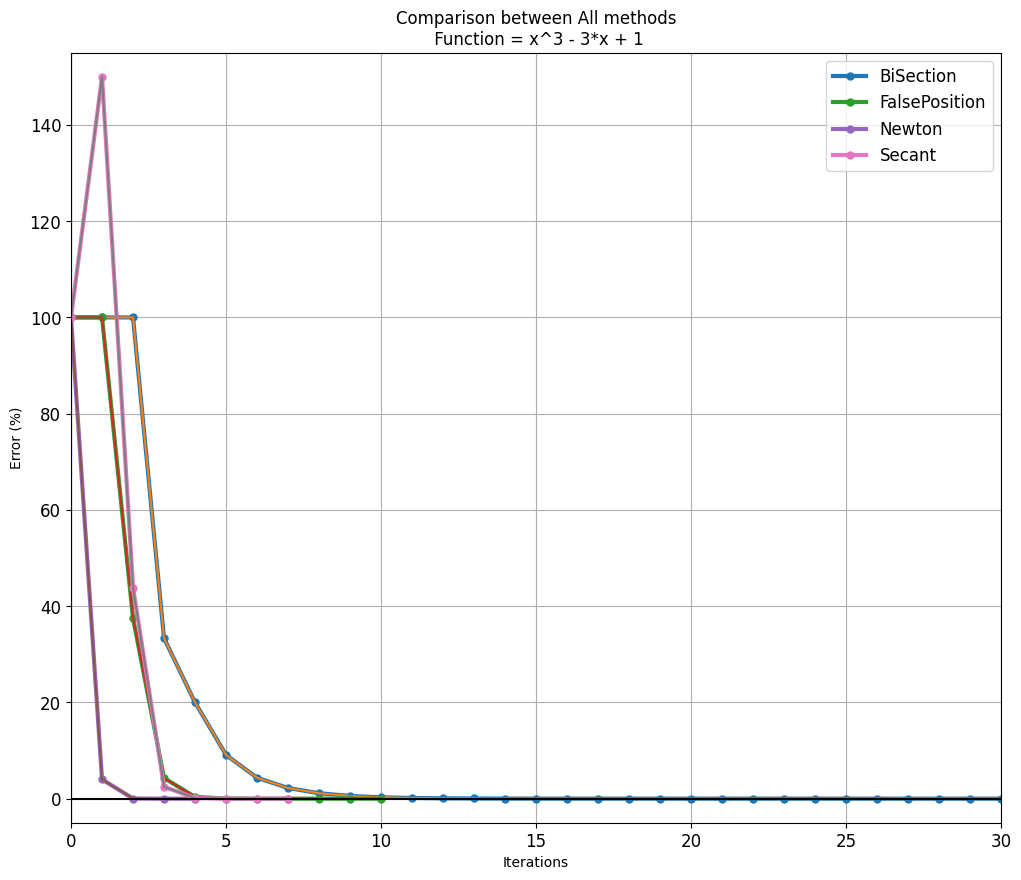

In [107]:
plotter_Function_Package(Iteration_Collection,Errors_Collection,Name_Collection=Name_Collection,Function=function)

In [100]:
def Collection(Input:Item,Function):
    Steps_Bi = main.Bisection(item = Input,all_steps=[]).steps
    Steps_FP = main.False_Position(item = Input,all_steps=[]).steps
    Errors_Bi = [float(Steps_Bi[i].Error*100) for i in range(len(Steps_Bi))]
    Iterations_Bi = [i for i in range(len(Steps_Bi))]
    Errors_FP = [float(Steps_FP[i].Error*100) for i in range(len(Steps_FP))]
    Iterations_FP = [i for i in range(len(Steps_FP))]
    Steps_Newton = main.Newton_Normal(item = Input,all_steps=[]).steps
    Steps_Secant = main.secant_method(item=Input,all_steps=[]).steps
    if(len(Steps_Newton)!=0):
        Errors_Newton = [float(Steps_Newton[i].Error) for i in range(len(Steps_Newton))]
        Iterations_Newton = [i for i in range(len(Steps_Newton))]
    else:
        Errors_Newton = []
        Iterations_Newton = []
    if(len(Steps_Newton)!=0):    
        Errors_Secant = [float(Steps_Secant[i].Error) for i in range(len(Steps_Secant))]
        Iterations_Secant = [i for i in range(len(Steps_Secant))]
    else:
        Errors_Secant = []
        Iterations_Secant = []
    Iteration_Collection = {1:Iterations_Bi,
                        2:Iterations_FP,
                        3:Iterations_Newton,
                        4:Iterations_Secant}
    Errors_Collection = {1:Errors_Bi,
                            2:Errors_FP,
                            3:Errors_Newton,
                            4:Errors_Secant}
    Name_Collection = {1:"BiSection",
                            2:"FalsePosition",
                            3:"Newton",
                            4:"Secant"}
    plotter_Function_Package(Iteration_Collection,Errors_Collection,Name_Collection,Function=Function)

In [101]:
function_2 = "exp(x^2) -1 +x^2 +3*x + cos(2*x)^2"
Inputx = Item.construct(Function= function_2
             ,MethodId="x"
             ,X_Lower= Decimal("-2")
             ,X_Upper=Decimal("-0.5")
             ,Xo_Initial=Decimal("-2")
             ,X1_Initial=Decimal("-.5")
             ,maxIteration=30
             ,precision=20
             ,Tolerance=1e-9
             )

C:\Users\User\AppData\Local\Temp\ipykernel_24836\4073215160.py:2: PydanticDeprecatedSince20: The `construct` method is deprecated; use `model_construct` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  Inputx = Item.construct(Function= function_2


-2


C:\Users\User\AppData\Local\Temp\ipykernel_24836\2164352438.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  Fig.show()


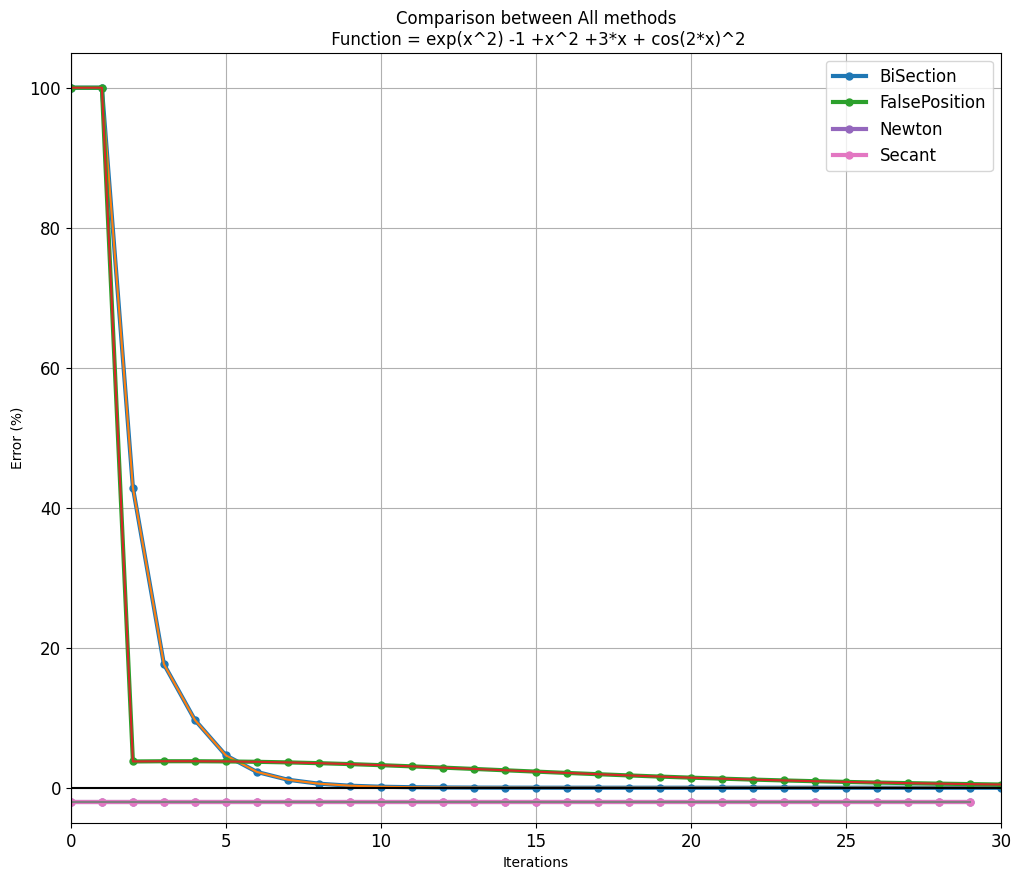

In [102]:
Collection(Inputx,Function=function_2)

In [103]:
function_3 = "exp(x) -10*x +.2*x^5 +3*x^2 + cos(2*x)^2"
Inputy = Item.construct(Function= function_3
             ,MethodId="x"
             ,X_Lower= Decimal("-1")
             ,X_Upper=Decimal("1")
             ,Xo_Initial=Decimal("-1")
             ,X1_Initial=Decimal("1")
             ,maxIteration=30
             ,precision=20
             ,Tolerance=1e-9
             )

C:\Users\User\AppData\Local\Temp\ipykernel_24836\1389797180.py:2: PydanticDeprecatedSince20: The `construct` method is deprecated; use `model_construct` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  Inputy = Item.construct(Function= function_3


-1


C:\Users\User\AppData\Local\Temp\ipykernel_24836\2164352438.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  Fig.show()


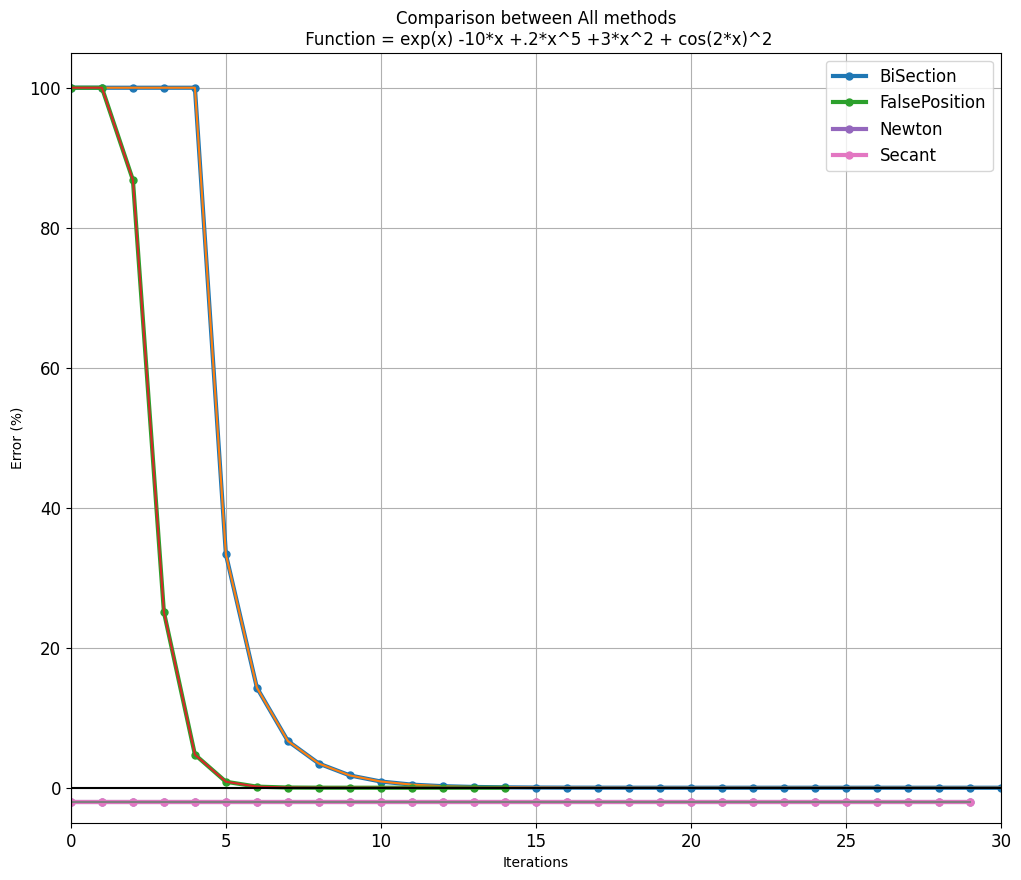

In [104]:
Collection(Inputy,Function=function_3)

0.5
epsilon reached in 7 iterations


C:\Users\User\AppData\Local\Temp\ipykernel_24836\3090659295.py:2: PydanticDeprecatedSince20: The `construct` method is deprecated; use `model_construct` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  InputFinal = Item.construct(Function= final
C:\Users\User\AppData\Local\Temp\ipykernel_24836\2164352438.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  Fig.show()


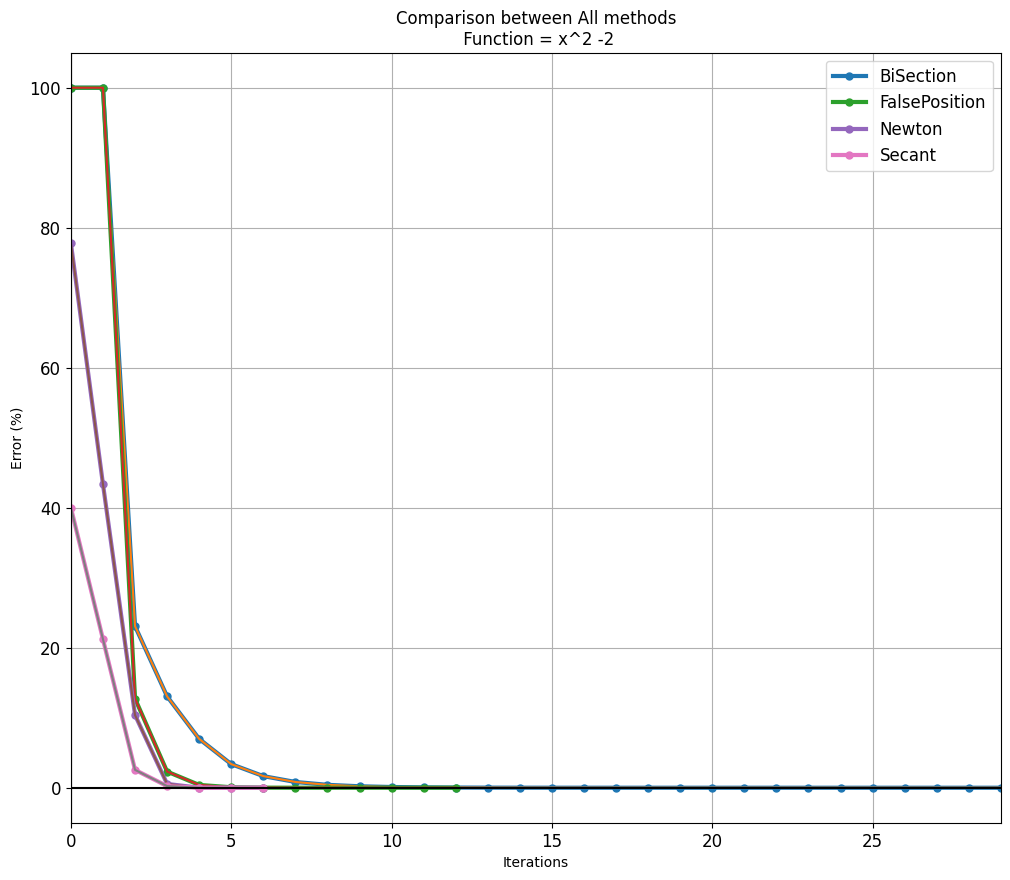

In [105]:
final = "x^2 -2"
InputFinal = Item.construct(Function= final
             ,MethodId="x"
             ,X_Lower= Decimal(".5")
             ,X_Upper=Decimal("2")
             ,Xo_Initial=Decimal(".5")
             ,X1_Initial=Decimal("1")
             ,maxIteration=30
             ,precision=20
             ,Tolerance=1e-9
             )
Collection(InputFinal,Function=final)